## Animations with `matplotlib`

**Raibatak Das - 2020-12-29**

This notebook demonstrates how to use the `matplotlib.animation` module to create dynamic plots. Three specific examples shown below visualize the behavior of particles undergoing a Brownian random walk

Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.animation as anim
from IPython.display import HTML
from pathlib import Path

%config InlineBackend.figure_format='retina'

mpl.rcParams.update({'font.size': 14})
# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(
    color = ["#1b9e77", "#d95f02", "#7570b3",
             "#e7298a", "#66a61e", "#e6ab02"]) 


### Example 1: 2D Brownian motion 

Simulate a collection of particles undergoing 2D Brownian motion. Create an animated plot showing particle positions over time. 

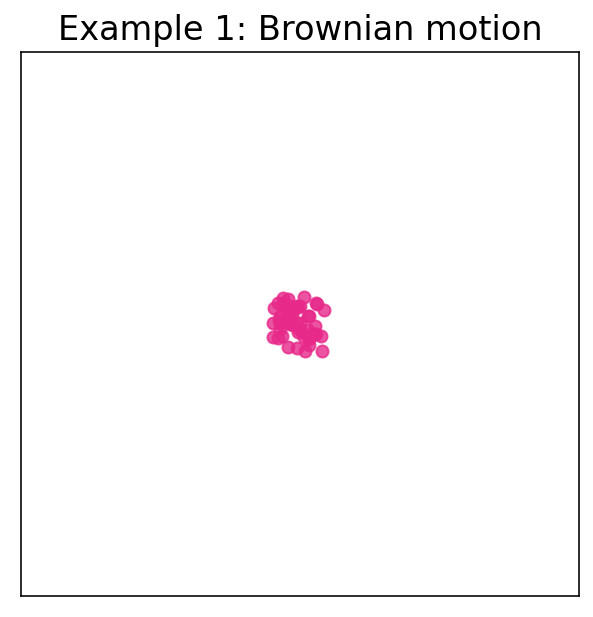

In [2]:
# Initialize particle positions within a central square 
nparticles = 50
r0 = 0.45 + 0.1 * np.random.rand(nparticles, 2)
    
# Create figure
fig, ax = plt.subplots(figsize = (5, 5))
pos = [ax.plot([], [], "o", color = "C3", ms = 6, alpha = 0.8)[0] 
       for j in range(nparticles)]

# Plot initial particle positions
def init():
    for jj, p in enumerate(pos):
        p.set_data(r0[jj, 0], r0[jj, 1])
    # Fix plot appearance
    ax.set_xlim([0, 1])
    ax.set_xticks([])
    ax.set_ylim([0, 1])
    ax.set_yticks([])
    ax.set_title("Example 1: Brownian motion")
    return(pos)

# Update particle positions
def move(k, sigma = 0.01):
    # Apply random normal displacement along each axis
    for p in pos:
        x, y = p.get_data()
        dx, dy = tuple(sigma * np.random.randn(2))
        p.set_data(x + dx, y + dy)
    return(pos)

ani = anim.FuncAnimation(fig, move, init_func = init,
                         frames = 300, interval = 50, blit = True)

In [ ]:
# Display animation inline
HTML(ani.to_jshtml())

In [ ]:
# Save as html to embed 
movie = ani.to_jshtml()
outfile = Path("rw-movie.html")
outfile.write_text(movie)

### Example 2: Brownian motion with particle tracks

This example shows how to display particle position and tracks (the path traveled by each particle) over time. For this simulation, the entire particle trajectory is first simulated.

In [3]:
def simulate_rw(nparticles = 15, nframes = 200, sigma = 0.01):
    """Simulate trajectories of diffusing particles"""
    # Initialize particle positions
    displacements = np.zeros((nframes, 2, nparticles))
    displacements[0, :, :] = 0.45 + 0.1 * np.random.rand(2, nparticles)
    # Simulate Brownian random walk
    displacements[1:, :, :] = np.random.normal(scale = sigma, 
                                               size = (nframes-1, 2, nparticles))
    # Compute positions
    r = np.cumsum(displacements, axis = 0)
    return(r)

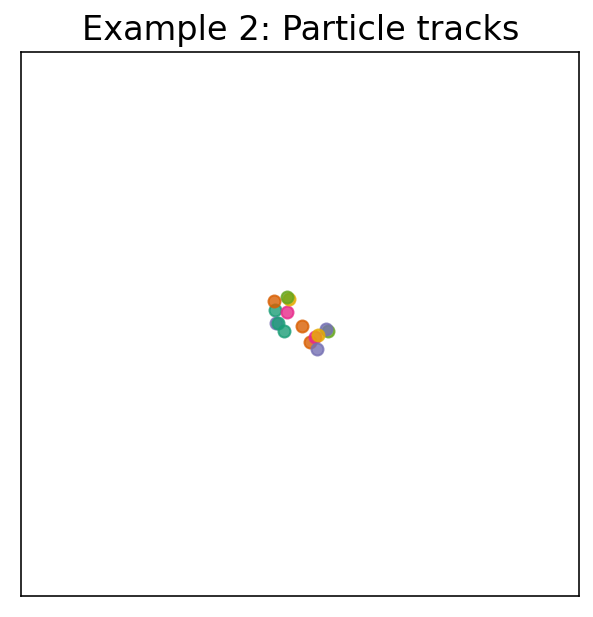

In [4]:
# Generate tracks
positions = simulate_rw()
nframes, _, nparticles = positions.shape

# Create figure
fig, ax = plt.subplots(figsize = (5, 5))
pts = [ax.plot([], [], "-o", alpha = 0.8)[0] 
       for j in range(nparticles)]

# Plot initial particle positions
def init():
    r0 = positions[0,:,:]
    for jj, p in enumerate(pts):
        p.set_data(r0[0, jj], r0[1, jj])
    # Set plot appearance
    ax.set_xlim([0, 1])
    ax.set_xticks([])
    ax.set_ylim([0, 1])
    ax.set_yticks([])
    ax.set_title("Example 2: Particle tracks")
    return(pts)

# Update particle positions
def move(k):
    for jj, p in enumerate(pts):
        r = positions[:k+1, :, jj]
        p.set_data(r[:, 0], r[:, 1])
        p.set_markevery((k, k+1))
    return(pts)

ani = anim.FuncAnimation(fig, move, init_func = init,
                         frames = nframes, interval = 50, blit = True)

In [ ]:
# Display animation inline
HTML(ani.to_jshtml())

In [ ]:
# Save as html to embed 
movie = ani.to_jshtml()
outfile = Path("rw-tracks.html")
outfile.write_text(movie)

### Example 3: Display particle trails

Show partial particle tracks

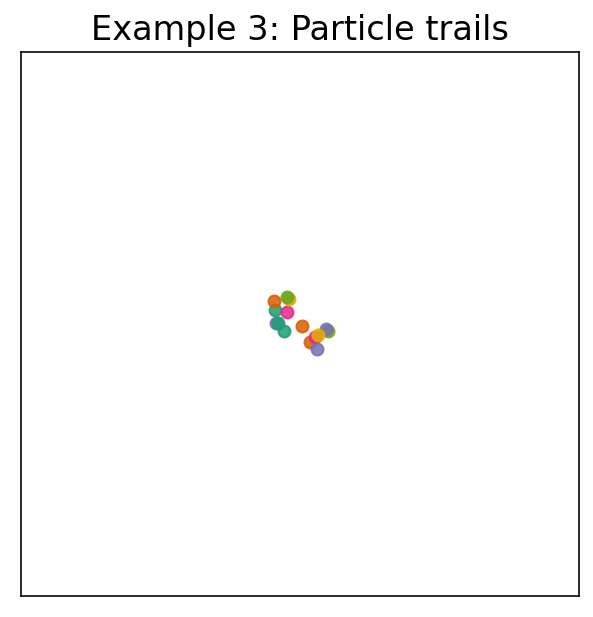

In [5]:
# Create figure
fig, ax = plt.subplots(figsize = (5, 5))
pts = [ax.plot([], [], "-o", alpha = 0.85)[0] 
       for j in range(nparticles)]

# Plot initial particle positions
def init():
    r0 = positions[0,:,:]
    for jj, p in enumerate(pts):
        p.set_data(r0[0, jj], r0[1, jj])
    # Set plot appearance
    ax.set_xlim([0, 1])
    ax.set_xticks([])
    ax.set_ylim([0, 1])
    ax.set_yticks([])
    ax.set_title("Example 3: Particle trails")
    return(pts)

# Update particle positions
def move(k, trail = 30):
    for jj, p in enumerate(pts):
        if (k <= trail):
            r = positions[:k+1, :, jj]
            n = k
        else:
            r = positions[(k+1 - trail):k+1, :, jj]
            n = trail-1
        p.set_data(r[:, 0], r[:, 1])
        p.set_markevery((n, n+1))
    return(pts)

ani = anim.FuncAnimation(fig, move, init_func = init,
                         frames = nframes, interval = 50, blit = True)

In [ ]:
# Display animation inline
HTML(ani.to_jshtml())

In [ ]:
# Save as html to embed 
movie = ani.to_jshtml()
outfile = Path("rw-trails.html")
outfile.write_text(movie)